In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/home/vansh/Downloads/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/vansh/Downloads/kaggle/data/test/Accident/acc1 (7).jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test10_33.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test10_56.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test10_61.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test12_13.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test12_16.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test13_22.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test15_15.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test18_22.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test18_24.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test19_26.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test1_18.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test1_20.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test1_24.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test1_26.jpg
/home/vansh/Downloads/kaggle/data/test/Accident/test1_27.jpg
/home/vansh/Do

In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

2024-04-19 18:27:25.722920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 18:27:26.166799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vansh/.conda/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:
2024-04-19 18:27:26.166846: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-19 18:27:28.432212: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

In [11]:
batch_size = 100
img_height = 250
img_width = 250

In [12]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/vansh/Downloads/kaggle/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/vansh/Downloads/kaggle/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    '/home/vansh/Downloads/kaggle/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [13]:
class_names = training_dataset.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_dataset=training_dataset.cache().prefetch(buffer_size=AUTOTUNE)
testing_dataset = testing_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
img_shape = (img_height, img_width, 3)

# Load the MobileNetV2 model without the top layer and without loading weights
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights=None)

# Make the base model non-trainable
base_model.trainable = False

# Load the weights from your local file
base_model.load_weights('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5')

In [15]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(training_dataset, validation_data = validation_dataset, epochs = 50)

model.save('accident.h5')

Epoch 1/50


2024-04-19 18:32:02.786343: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.
2024-04-19 18:32:02.931410: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 619353600 exceeds 10% of free system memory.


1/8 [==>...........................] - ETA: 42s - loss: 0.7869 - accuracy: 0.5100

2024-04-19 18:32:04.611503: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.
2024-04-19 18:32:04.698982: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 619353600 exceeds 10% of free system memory.


2/8 [======>.......................] - ETA: 9s - loss: 1.1406 - accuracy: 0.5100 

2024-04-19 18:32:06.286968: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


8/8 [==============================] - 20s 2s/step - loss: 0.8162 - accuracy: 0.5424 - val_loss: 0.6342 - val_accuracy: 0.6429
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 0.5283 - accuracy: 0.7434 - val_loss: 0.4816 - val_accuracy: 0.8163
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 0.3926 - accuracy: 0.8281 - val_loss: 0.3893 - val_accuracy: 0.8265
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 0.2554 - accuracy: 0.9064 - val_loss: 0.3132 - val_accuracy: 0.8571
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 0.1527 - accuracy: 0.9532 - val_loss: 0.3858 - val_accuracy: 0.8265
Epoch 6/50
8/8 [==============================] - 15s 2s/step - loss: 0.0886 - accuracy: 0.9722 - val_loss: 0.2881 - val_accuracy: 0.8776
Epoch 7/50
8/8 [==============================] - 15s 2s/step - loss: 0.0722 - accuracy: 0.9747 - val_loss: 0.4786 - val_accuracy: 0.8367
Epoch 8/50
8/8 [=============================

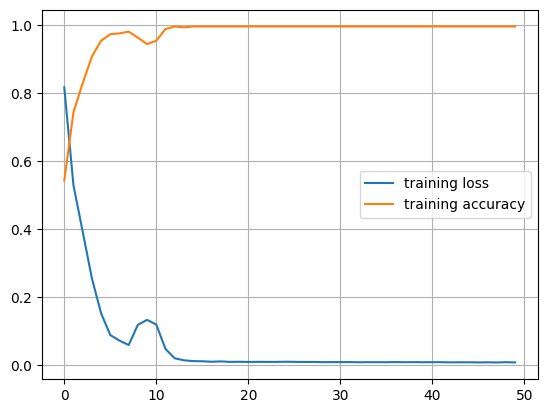

In [18]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

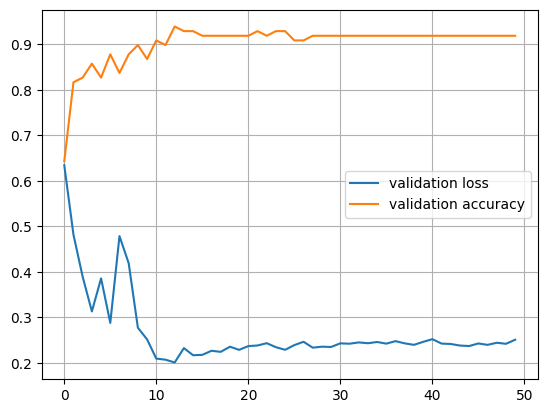

In [19]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 2s 372ms/step


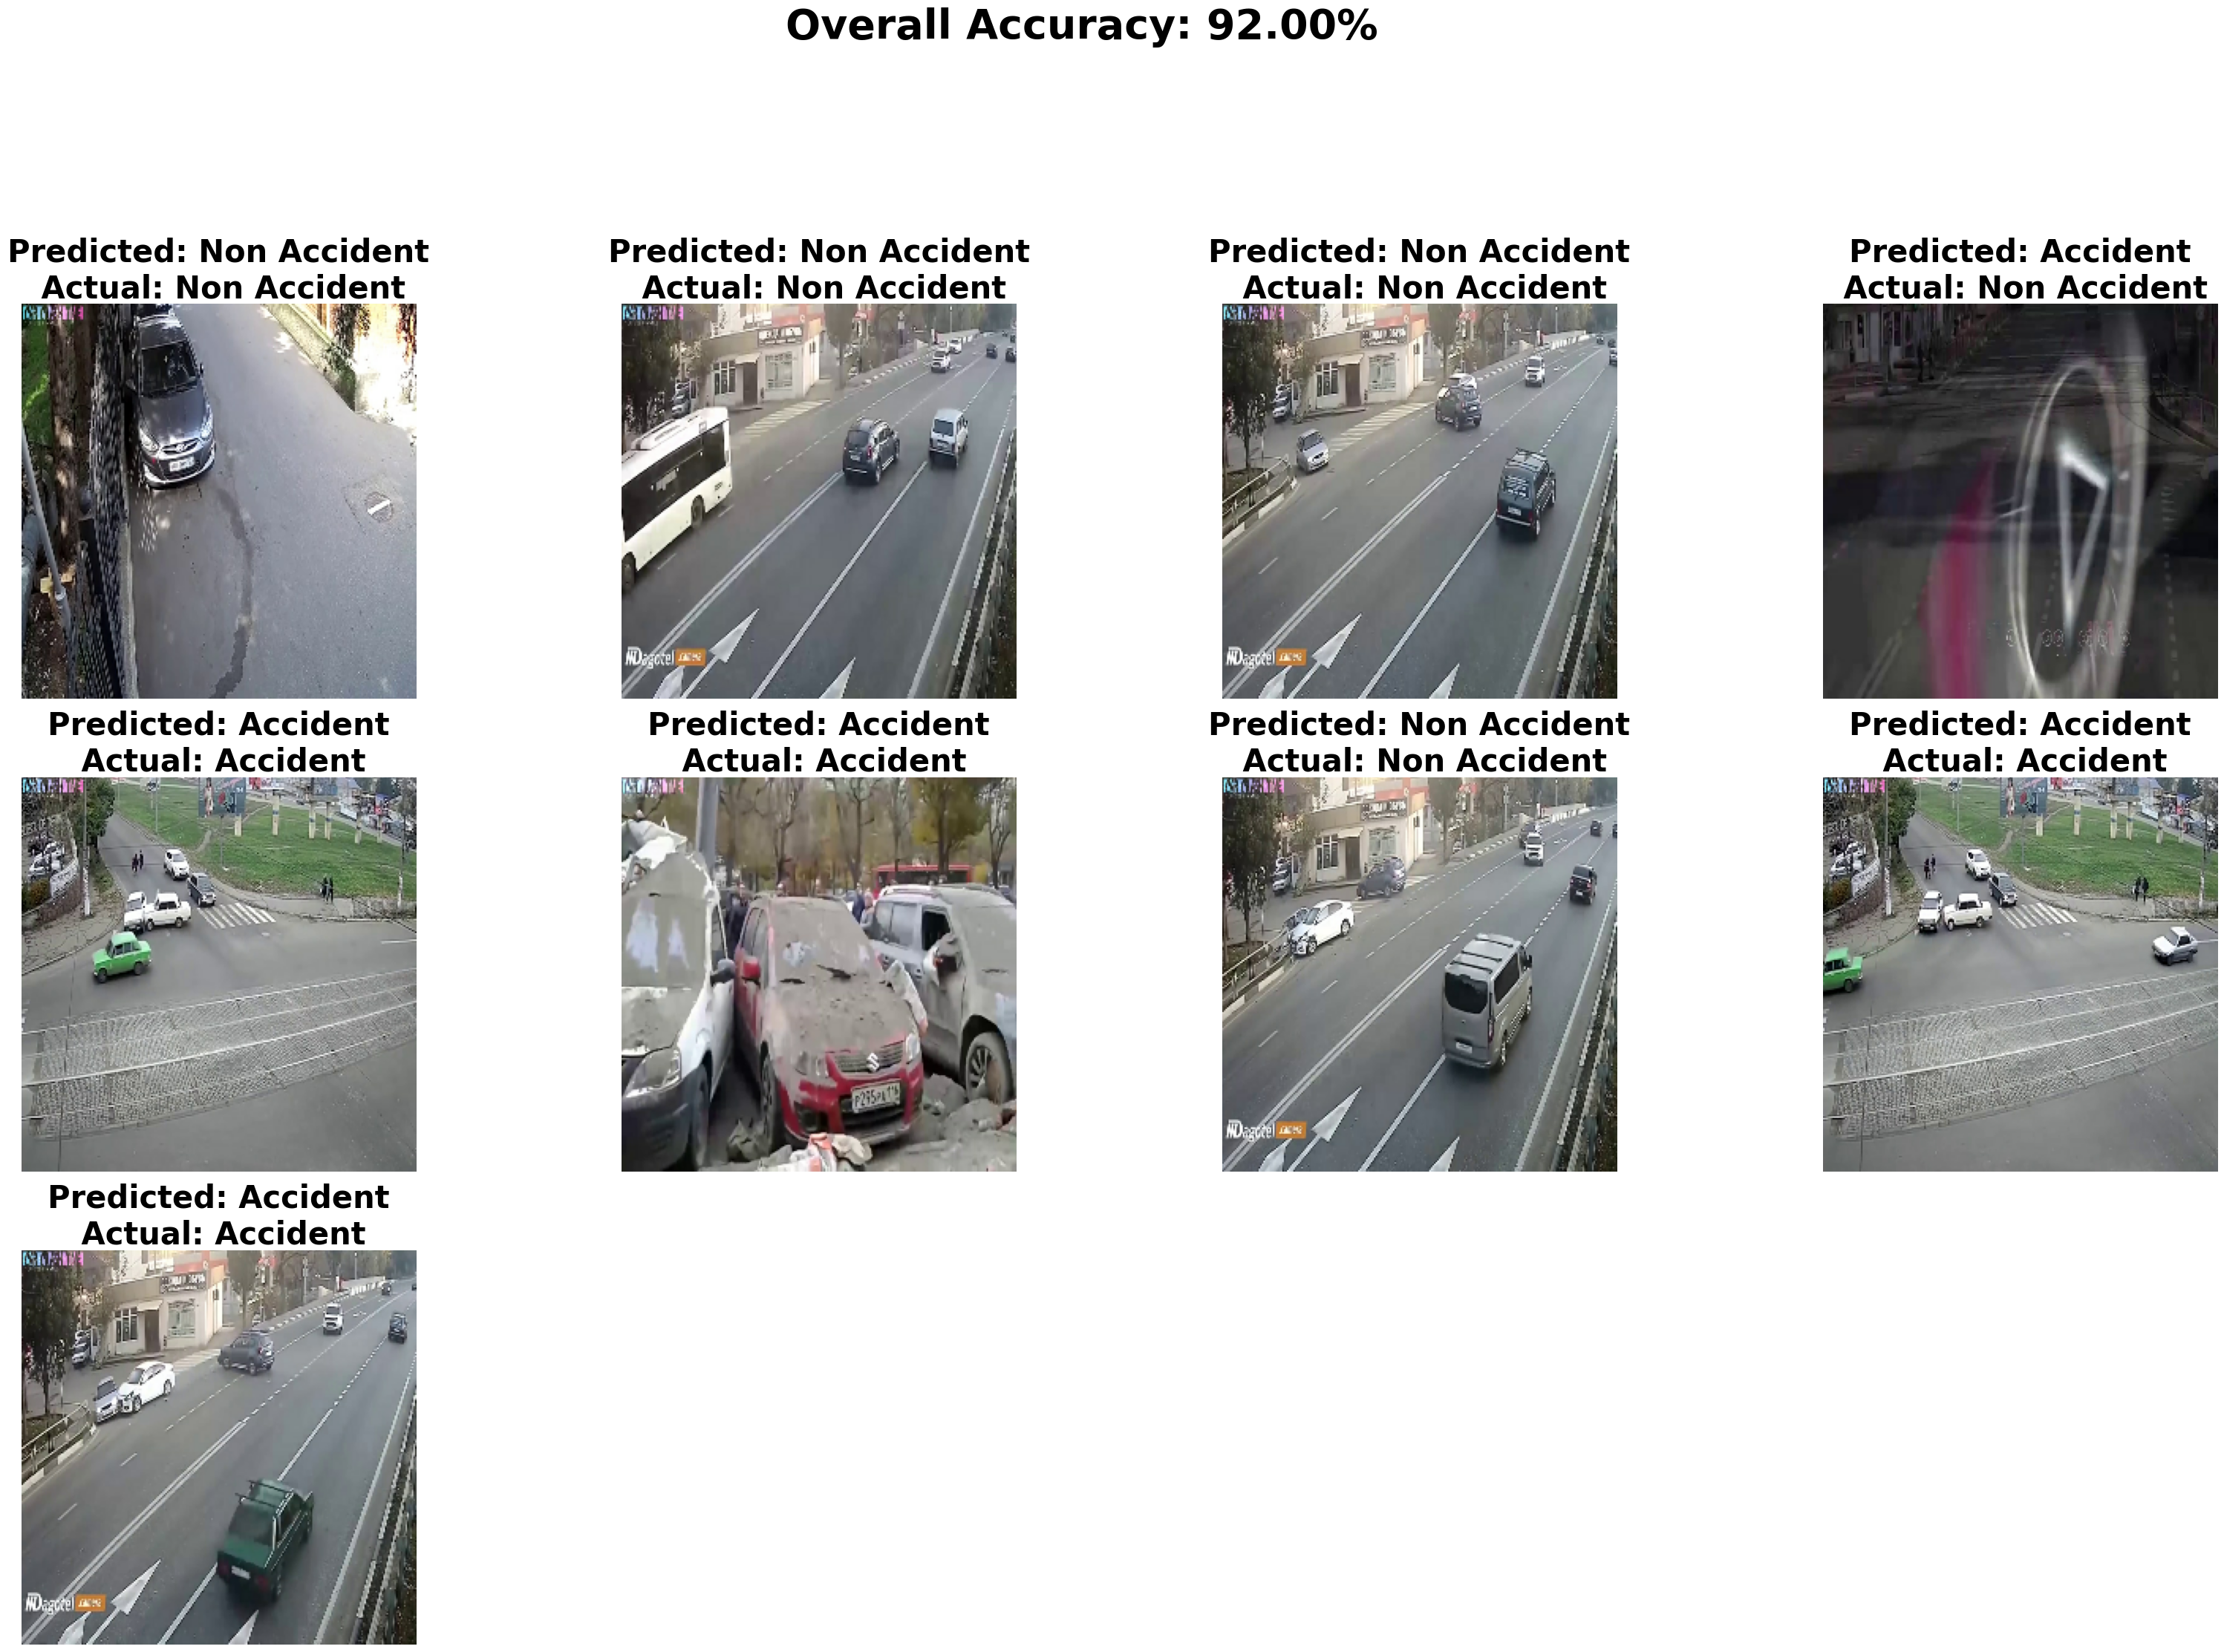

In [20]:
AccuracyVector = []

plt.figure(figsize=(40, 40))
for images, labels in testing_dataset.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    
    # Calculate accuracy
    accuracy = np.mean(AccuracyVector)
    
    for i in range(9):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Display predicted and actual labels along with accuracy
        plt.title('Predicted: ' + predlabel[i] + '\n Actual: ' + class_names[labels[i]], fontsize=30, fontweight='bold')
        plt.axis('off')
        plt.grid(True)

# Display overall accuracy
plt.suptitle(f'Overall Accuracy: {accuracy:.2%}', fontsize=40,fontweight='bold')
plt.show()

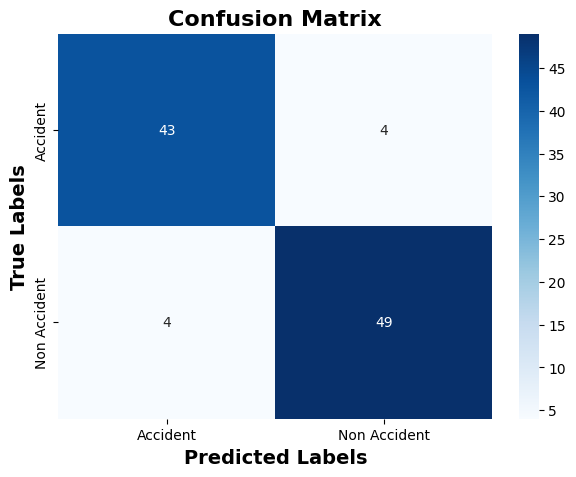

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, prdlbl)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels', fontsize=14, fontweight='bold')
plt.ylabel('True Labels', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [33]:
import tensorflow as tf
import cv2
import numpy as np

# Load the accident detection model
accident_model = tf.keras.models.load_model('accident.h5')

# Open the video file
video_path = '7.mp4'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for accident detection
    img_width = 250
    img_height = 250
    frame_accident = cv2.resize(frame, (img_width, img_height))
    frame_accident = frame_accident / 255.0
    frame_accident = np.expand_dims(frame_accident, axis=0)

    # Run the accident detection model
    prediction = accident_model.predict(frame_accident)

    # Draw "Accident Detected!" text if an accident is predicted
    if np.argmax(prediction) == 1:  # Assuming class 1 is "accident"
        cv2.putText(frame, "Accident Detected!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 29ms/step


In [32]:
import tensorflow as tf
import cv2
import numpy as np
import time
import os

# Load the accident detection model
accident_model = tf.keras.models.load_model('accident.h5')

# Open the video file
video_path = '7.mp4'
cap = cv2.VideoCapture(video_path)

# Define variables for video clip recording
is_accident_detected = False
accident_start_time = None
video_writer = None
output_file_name = 'accident_clip.mp4'
output_file_counter = 1

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for accident detection
    img_width = 250
    img_height = 250
    frame_accident = cv2.resize(frame, (img_width, img_height))
    frame_accident = frame_accident / 255.0
    frame_accident = np.expand_dims(frame_accident, axis=0)

    # Run the accident detection model
    prediction = accident_model.predict(frame_accident)

    # Draw "Accident Detected!" text if an accident is predicted
    if np.argmax(prediction) == 1:  # Assuming class 1 is "accident"
        if not is_accident_detected:
            is_accident_detected = True
            accident_start_time = time.time()

        # Draw "Accident Detected!" text on the frame
        cv2.putText(frame, "Accident Detected!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Check if accident has been detected for more than 1 second
    if is_accident_detected:
        current_time = time.time()
        if current_time - accident_start_time > 1:
            # If video_writer is not created yet, create it
            if video_writer is None:
                # Check if the output file already exists
                while os.path.exists(output_file_name):
                    output_file_counter += 1
                    output_file_name = f'accident_clip_{output_file_counter}.mp4'
                video_writer = cv2.VideoWriter(output_file_name, cv2.VideoWriter_fourcc(*'XVID'), 20.0, (frame.shape[1], frame.shape[0]))

            # Write frame to the video clip
            video_writer.write(frame)

            # Check if 5-6 seconds have passed since the accident was detected
            if current_time - accident_start_time > 6:
                # Close the video writer and reset variables
                is_accident_detected = False
                accident_start_time = None
                if video_writer is not None:
                    video_writer.release()
                    video_writer = None

    # Display the frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 26ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 [==============================] - 0s 25ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 [==============================] - 0s 27ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 [==============================] - 0s 26ms/step
